In [1]:
import pandas as pd
import re

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
summary = pd.read_csv("atusdata/atussum_2013/atussum_2013.dat")
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 413 entries, tucaseid to t500107
dtypes: float64(1), int64(412)
memory usage: 36.0 MB


In [5]:
summary.columns

Index(['tucaseid', 'TUFINLWGT', 'TRYHHCHILD', 'TEAGE', 'TESEX', 'PEEDUCA',
       'PTDTRACE', 'PEHSPNON', 'GTMETSTA', 'TELFS', 
       ...
       't181501', 't181599', 't181601', 't181801', 't189999', 't500101',
       't500103', 't500105', 't500106', 't500107'],
      dtype='object', length=413)

Pertinent columns:

* TUFINLWGT - statistical weight of respondent
* TRYHHCHILD - age of youngest child in household
* TEAGE - age of respondent
* TESEX - sex of respondent
* TELFS - working status of respondent
* TRCHILDNUM - number of children in household

In [6]:
summary.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181501,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107
0,20130101130004,11899905.662034,12,22,2,40,8,2,1,5,...,0,0,0,0,0,0,0,0,0,0
1,20130101130112,4447638.009513,1,39,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20130101130123,10377056.507734,-1,47,2,40,1,2,1,4,...,25,0,0,0,0,0,0,0,0,0
3,20130101130611,7731257.992805,-1,50,2,40,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,20130101130616,4725269.227067,-1,45,2,40,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
adults_crit = summary.TEAGE >= 18
no_children_crit = summary.TRCHILDNUM == 0

In [8]:
adults = summary[adults_crit]
adults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10953 entries, 0 to 11384
Columns: 413 entries, tucaseid to t500107
dtypes: float64(1), int64(412)
memory usage: 34.6 MB


In [9]:
people_with_no_children = summary[no_children_crit]
people_with_no_children.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6481 entries, 2 to 11381
Columns: 413 entries, tucaseid to t500107
dtypes: float64(1), int64(412)
memory usage: 20.5 MB


In [10]:
adults_with_no_children = summary[adults_crit & no_children_crit]
adults_with_no_children.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6481 entries, 2 to 11381
Columns: 413 entries, tucaseid to t500107
dtypes: float64(1), int64(412)
memory usage: 20.5 MB


In [11]:
data = adults_with_no_children[['TUFINLWGT', 't120303']]
data = data.rename(columns={"TUFINLWGT": "weight", "t120303": "minutes"})
data.head()

,weight,minutes
2,10377056.507734,60
3,7731257.992805,65
4,4725269.227067,90
5,2372791.046351,270
6,5671341.270490,244


In [12]:
data['weighted_minutes'] = data.weight * data.minutes

In [13]:
data.head()

,weight,minutes,weighted_minutes
2,10377056.507734,60,6.226234e+08
3,7731257.992805,65,5.025318e+08
4,4725269.227067,90,4.252742e+08
5,2372791.046351,270,6.406536e+08
6,5671341.270490,244,1.383807e+09


In [14]:
# Minutes on average spent watching TV (unweighted) - DO NOT USE
data.minutes.sum() / len(data)

211.67427866070051

In [15]:
# Minutes on average spent watching TV (weighted)
data.weighted_minutes.sum() / data.weight.sum()

190.25402840855642

In [16]:
def activity_columns(data, activity_code):
    """For the activity code given, return all columns that fall under that activity."""
    col_prefix = "t{}".format(activity_code)
    return [column for column in data.columns if re.match(col_prefix, column)]

In [17]:
activity_columns(summary, "0101")

['t010101', 't010102']

In [18]:
def average_minutes(data, activity_code):
    cols = activity_columns(data, activity_code)
    activity_data = data[cols]
    activity_sums = activity_data.sum(axis=1)
    data = data.loc[:, ['TUFINLWGT']]
    data['minutes'] = activity_sums
    data = data.rename(columns={"TUFINLWGT": "weight"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

In [19]:
average_minutes(adults_with_no_children, "0101") / 60

8.750853706181001

In [20]:
average_minutes(adults_with_no_children, "01") / 60

9.5541911543273592

In [21]:
average_minutes(adults_with_no_children, "0102") / 60

0.68844051636328452

## Joining files

In [22]:
respondents = pd.read_csv("atusdata/atusresp_2013/atusresp_2013.dat")
activities = pd.read_csv("atusdata/atusact_2013/atusact_2013.dat")

In [23]:
respondents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 175 entries, TUCASEID to TXTONHH
dtypes: float64(1), int64(172), object(2)
memory usage: 15.3+ MB


In [24]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215576 entries, 0 to 215575
Data columns (total 31 columns):
TUCASEID        215576 non-null int64
TUACTIVITY_N    215576 non-null int64
TEWHERE         215576 non-null int64
TRTCCTOT_LN     215576 non-null int64
TRTCC_LN        215576 non-null int64
TRTCOC_LN       215576 non-null int64
TRTEC_LN        215576 non-null int64
TRTHH_LN        215576 non-null int64
TRTNOHH_LN      215576 non-null int64
TRTOHH_LN       215576 non-null int64
TRTONHH_LN      215576 non-null int64
TRTO_LN         215576 non-null int64
TRWBELIG        215576 non-null int64
TUACTDUR        215576 non-null int64
TUACTDUR24      215576 non-null int64
TUCC5           215576 non-null int64
TUCC5B          215576 non-null int64
TUCC7           215576 non-null int64
TUCC8           215576 non-null int64
TUCUMDUR        215576 non-null int64
TUCUMDUR24      215576 non-null int64
TUDURSTOP       215576 non-null int64
TUEC24          215576 non-null int64
TUSTARTTIM     

In [25]:
respondents.head()

,TUCASEID,TULINENO,TUYEAR,TUMONTH,TEABSRSN,TEERN,TEERNH1O,TEERNH2,TEERNHRO,TEERNHRY,...,TXSPEMPNOT,TXSPUHRS,TXTCC,TXTCCTOT,TXTCOC,TXTHH,TXTNOHH,TXTO,TXTOHH,TXTONHH
0,20130101130004,1,2013,1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,0,0,0,0,-1,-1,-1
1,20130101130112,1,2013,1,-1,-1,-1,-1,-1,2,...,0,0,0,0,0,0,-1,0,0,-1
2,20130101130123,1,2013,1,-1,-1,-1,-1,-1,-1,...,0,0,-1,0,0,-1,-1,-1,-1,-1
3,20130101130611,1,2013,1,-1,-1,-1,-1,-1,2,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,20130101130616,1,2013,1,-1,-1,-1,-1,-1,2,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1


In [26]:
activities.head()

,TUCASEID,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,...,TUDURSTOP,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE
0,20130101130004,1,-1,0,0,0,-1,0,0,-1,...,2,-1,04:00:00,12:00:00,1,1,1,10101,101,0
1,20130101130004,2,1,5,5,0,-1,5,5,-1,...,1,-1,12:00:00,12:05:00,11,1,1,110101,1101,0
2,20130101130004,3,1,120,120,0,-1,120,120,-1,...,1,-1,12:05:00,14:05:00,12,3,3,120303,1203,0
3,20130101130004,4,1,0,0,0,-1,0,0,-1,...,2,-1,14:05:00,19:00:00,6,3,1,60301,603,0
4,20130101130004,5,1,30,30,0,-1,30,30,-1,...,1,-1,19:00:00,19:30:00,11,1,1,110101,1101,0


In [27]:
merged = pd.merge(respondents, activities, left_on="TUCASEID", right_on="TUCASEID")
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215576 entries, 0 to 215575
Columns: 205 entries, TUCASEID to TXWHERE
dtypes: float64(1), int64(200), object(4)
memory usage: 338.8+ MB


In [28]:
merged[["TUCASEID", "TUACTIVITY_N", "TXTCOC"]].head()

,TUCASEID,TUACTIVITY_N,TXTCOC
0,20130101130004,1,0
1,20130101130004,2,0
2,20130101130004,3,0
3,20130101130004,4,0
4,20130101130004,5,0


In [29]:
telfs = pd.Series({1: "Employed - at work",
                   2: "Employed - absent",
                   3: "Unemployed - laid off",
                   4: "Unemployed - looking",
                   5: "Not in labor force"})

In [30]:
telfs

1       Employed - at work
2        Employed - absent
3    Unemployed - laid off
4     Unemployed - looking
5       Not in labor force
dtype: object

In [31]:
summary.TELFS.map(telfs)

0          Not in labor force
1          Employed - at work
2        Unemployed - looking
3          Employed - at work
4          Employed - at work
5          Not in labor force
6          Not in labor force
7          Employed - at work
8          Employed - at work
9          Employed - at work
10         Employed - at work
11         Employed - at work
12         Employed - at work
13         Employed - at work
14         Not in labor force
15         Not in labor force
16         Employed - at work
17          Employed - absent
18         Employed - at work
19       Unemployed - looking
20       Unemployed - looking
21         Employed - at work
22         Employed - at work
23         Not in labor force
24         Employed - at work
25         Employed - at work
26         Not in labor force
27         Not in labor force
28       Unemployed - looking
29         Employed - at work
                 ...         
11355       Employed - absent
11356      Employed - at work
11357     

In [32]:
type(summary["TELFS"])

pandas.core.series.Series

In [33]:
type(summary.TELFS)

pandas.core.series.Series

# Sleep by age

In [34]:
# Our goal:

# Age   Minutes of sleep
# 1-5     600
# 6-10    590
# 11-15 ...

def convert_age(age):
    return age // 5

summary.TEAGE.map(convert_age).head()

0     4
1     7
2     9
3    10
4     9
Name: TEAGE, dtype: int64

In [35]:
summary['age_band'] = summary.TEAGE.map(convert_age)

In [36]:
[average_minutes(summary[summary.age_band == age_band], "010101")
 if len(summary[summary.age_band == age_band]) > 0 else 0
 for age_band in range(18)]   

[0,
 0,
 0,
 572.87495936471623,
 545.04318394849906,
 520.25114205525199,
 514.23103878935706,
 506.35564345802067,
 509.21941845245271,
 515.01419403985426,
 497.90094524405453,
 505.96632253572875,
 506.25502712030993,
 509.91653385147828,
 508.20989656086829,
 536.97219104267947,
 549.6442198313672,
 570.92909692576973]

In [37]:
[len(summary[summary.age_band == age_band])
 for age_band in range(18)]   

[0,
 0,
 0,
 630,
 469,
 758,
 1067,
 1068,
 1081,
 989,
 1031,
 1007,
 892,
 827,
 531,
 423,
 352,
 260]

Let's try this just with Pandas.

In [38]:
summary2 = summary.loc[:, ["age_band", "t010101", "TUFINLWGT"]]

In [39]:
summary2.head()

,age_band,t010101,TUFINLWGT
0,4,540,11899905.662034
1,7,580,4447638.009513
2,9,450,10377056.507734
3,10,450,7731257.992805
4,9,570,4725269.227067


In [40]:
summary2 = summary2.rename(columns={"t010101": "minutes", "TUFINLWGT": "weight"})

In [41]:
summary2.head()

,age_band,minutes,weight
0,4,540,11899905.662034
1,7,580,4447638.009513
2,9,450,10377056.507734
3,10,450,7731257.992805
4,9,570,4725269.227067


In [42]:
summary2["weighted_minutes"] = summary2.weight * summary2.minutes

In [43]:
import numpy as np

In [44]:
sleep_by_age = summary2.groupby("age_band").aggregate(np.sum)

In [45]:
sleep_by_age.head()

,minutes,weight,weighted_minutes
age_band,,,
3,371328,7.633313e+09,4.372934e+12
4,259208,8.048953e+09,4.387027e+12
5,406272,7.619893e+09,3.964258e+12
6,558336,7.545708e+09,3.880237e+12
7,551864,6.989612e+09,3.539230e+12


In [46]:
sleep_by_age["mean_minutes"] = sleep_by_age.weighted_minutes / sleep_by_age.weight

In [47]:
sleep_by_age

,minutes,weight,weighted_minutes,mean_minutes
age_band,,,,
3,371328,7.633313e+09,4.372934e+12,572.874959
4,259208,8.048953e+09,4.387027e+12,545.043184
5,406272,7.619893e+09,3.964258e+12,520.251142
6,558336,7.545708e+09,3.880237e+12,514.231039
7,551864,6.989612e+09,3.539230e+12,506.355643
8,565815,7.468974e+09,3.803347e+12,509.219418
9,516899,7.629460e+09,3.929280e+12,515.014194
10,523819,8.154812e+09,4.060288e+12,497.900945
11,519690,7.642483e+09,3.866839e+12,505.966323


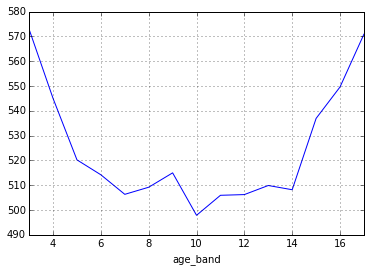

In [48]:
sleep_by_age.mean_minutes.plot()

In [49]:
summary3 = summary.loc[:, ["TEAGE", "t010101", "TUFINLWGT"]]

In [50]:
summary3 = summary3.rename(columns={"TEAGE": "age", 
                                    "t010101": "minutes", 
                                    "TUFINLWGT": "weight"})

In [51]:
summary3["weighted_minutes"] = summary3.weight * summary3.minutes

In [52]:
sleep_by_age = summary3.groupby("age").aggregate(np.sum)

In [53]:
sleep_by_age["mean_minutes"] = sleep_by_age.weighted_minutes / sleep_by_age.weight

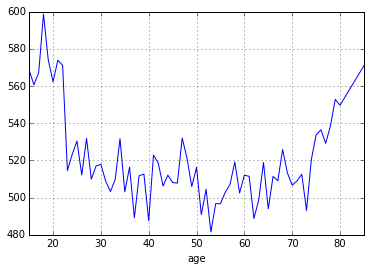

In [54]:
sleep_by_age.mean_minutes.plot()

In [55]:
summary.TEAGE.corr(summary.t010101)

-0.047836337700453285

##Grooming

###By Age

In [87]:
summary_groom = summary.loc[:, ["age_band", "t010201", "TUFINLWGT", "TESEX"]]

In [88]:
summary_groom = summary_groom.rename(columns={"t010201": "minutes", "TUFINLWGT": "weight"})

In [89]:
summary_groom.head()

,age_band,minutes,weight,TESEX
0,4,20,11899905.662034,2
1,7,35,4447638.009513,1
2,9,90,10377056.507734,2
3,10,30,7731257.992805,2
4,9,0,4725269.227067,2


In [90]:
summary_groom["weighted_minutes"] = summary_groom.weight * summary_groom.minutes

In [91]:
groom_by_age = summary_groom.groupby("age_band").aggregate(np.sum)

In [92]:
groom_by_age["mean_minutes"] = groom_by_age.weighted_minutes / groom_by_age.weight

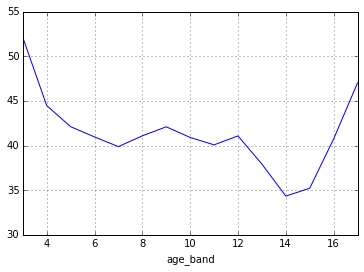

In [93]:
groom_by_age.mean_minutes.plot()

In [94]:
summary.TEAGE.corr(summary.t010201)

-0.028595624368569068

### By Gender

In [99]:
groom_by_sex = summary_groom.groupby("TESEX").aggregate(np.sum)

In [100]:
groom_by_sex.head()

,age_band,minutes,weight,weighted_minutes
TESEX,,,,
1,46468,168132,4.407395e+10,1.495422e+12
2,59188,306555,4.710701e+10,2.309853e+12


In [101]:
groom_by_sex["mean_minutes"] = groom_by_sex.weighted_minutes / groom_by_sex.weight

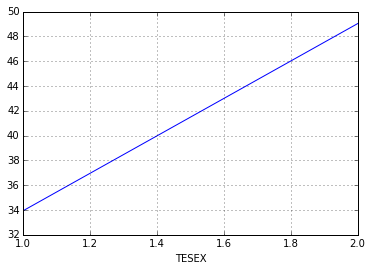

In [102]:
groom_by_sex.mean_minutes.plot()

In [108]:
summary.TESEX.corr(summary.t010201)

0.20881722433048577

##Cosumer Purchases

###By Age

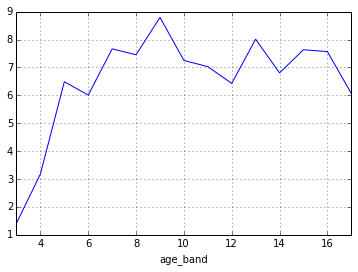

In [134]:
summary_purchase = summary.loc[:, ["age_band", "t070101", "TUFINLWGT", "TESEX"]]
summary_purchase = summary_purchase.rename(columns={"t070101": "minutes", "TUFINLWGT": "weight"})
summary_purchase["weighted_minutes"] = summary_purchase.weight * summary_purchase.minutes
purchase_by_age = summary_purchase.groupby("age_band").aggregate(np.sum)
purchase_by_age["mean_minutes"] = purchase_by_age.weighted_minutes / purchase_by_age.weight
purchase_by_age.mean_minutes.plot()

In [135]:
summary.TEAGE.corr(summary.t070101)

0.029644647916974871

### By Gender

In [136]:
purchase_by_sex = summary_purchase.groupby("TESEX").aggregate(np.sum)
purchase_by_sex["mean_minutes"] = purhcase_by_sex.weighted_minutes / purhcase_by_sex.weight
purhcase_by_sex.mean_minutes.plot()

NameError: name 'purhcase_by_sex' is not defined

In [133]:
summary.TESEX.corr(summary.t070101)

0.078088062845615341

##Civic Obligations

###By Age

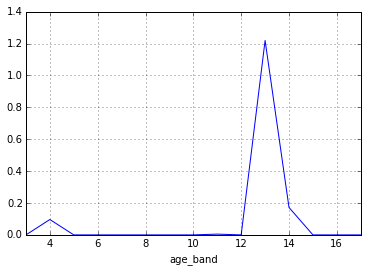

In [125]:
summary_civic = summary.loc[:, ["age_band", "t100201", "TUFINLWGT", "TESEX"]]
summary_civic = summary_civic.rename(columns={"t100201": "minutes", "TUFINLWGT": "weight"})
summary_civic["weighted_minutes"] = summary_civic.weight * summary_civic.minutes
civic_by_age = summary_civic.groupby("age_band").aggregate(np.sum)
civic_by_age["mean_minutes"] = civic_by_age.weighted_minutes / civic_by_age.weight
civic_by_age.mean_minutes.plot()

In [126]:
summary.TEAGE.corr(summary.t100201)

0.0089315732505438946

### By Gender

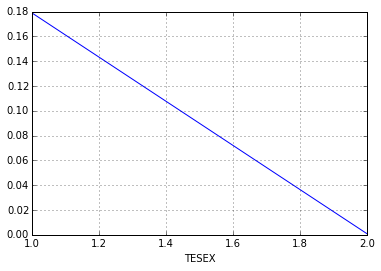

In [127]:
civic_by_sex = summary_civic.groupby("TESEX").aggregate(np.sum)
civic_by_sex["mean_minutes"] = civic_by_sex.weighted_minutes / civic_by_sex.weight
civic_by_sex.mean_minutes.plot()

In [129]:
summary.TESEX.corr(summary.t100201)

-0.01223412545755094

##Socializing

###By Age

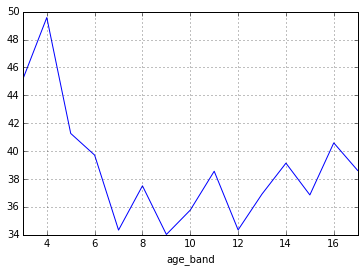

In [120]:
summary_socialize = summary.loc[:, ["age_band", "t120101", "TUFINLWGT", "TESEX"]]
summary_socialize = summary_socialize.rename(columns={"t120101": "minutes", "TUFINLWGT": "weight"})
summary_socialize["weighted_minutes"] = summary_socialize.weight * summary_socialize.minutes
socialize_by_age = summary_socialize.groupby("age_band").aggregate(np.sum)
socialize_by_age["mean_minutes"] = socialize_by_age.weighted_minutes / socialize_by_age.weight
socialize_by_age.mean_minutes.plot()

In [121]:
summary.TEAGE.corr(summary.t120101)

-0.023059100693610154

### By Gender

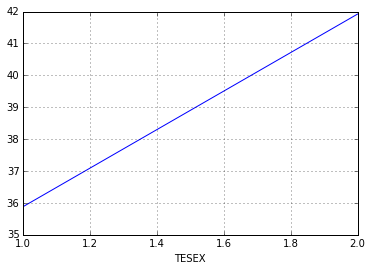

In [122]:
socialize_by_sex = summary_socialize.groupby("TESEX").aggregate(np.sum)
socialize_by_sex["mean_minutes"] = socialize_by_sex.weighted_minutes / socialize_by_sex.weight
socialize_by_sex.mean_minutes.plot()

In [124]:
summary.TESEX.corr(summary.t120101)

0.036011334397270937

## Religious activities

###By Age

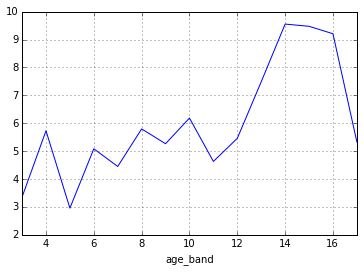

In [116]:
summary_religious = summary.loc[:, ["age_band", "t140101", "TUFINLWGT", "TESEX"]]
summary_religious = summary_religious.rename(columns={"t140101": "minutes", "TUFINLWGT": "weight"})
summary_religious["weighted_minutes"] = summary_religious.weight * summary_religious.minutes
religious_by_age = summary_religious.groupby("age_band").aggregate(np.sum)
religious_by_age["mean_minutes"] = religious_by_age.weighted_minutes / religious_by_age.weight
religious_by_age.mean_minutes.plot()

In [117]:
summary.TEAGE.corr(summary.t140101)

0.060949760545153379

### By Gender

In [118]:
religious_by_sex = summary_religious.groupby("TESEX").aggregate(np.sum)
religious_by_sex["mean_minutes"] = religious_by_sex.weighted_minutes / religous_by_sex.weight
religious_by_sex.mean_minutes.plot()

NameError: name 'religous_by_sex' is not defined

In [119]:
summary.TESEX.corr(summary.t140101)

0.032258850788445523

## Volunteer (building)

###By Age

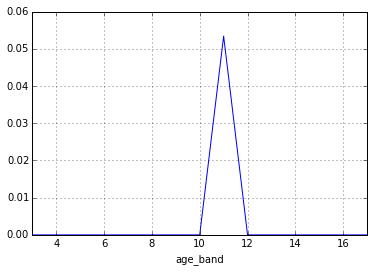

In [109]:
summary_volunteer = summary.loc[:, ["age_band", "t150301", "TUFINLWGT", "TESEX"]]
summary_volunteer = summary_volunteer.rename(columns={"t150301": "minutes", "TUFINLWGT": "weight"})
summary_volunteer["weighted_minutes"] = summary_volunteer.weight * summary_volunteer.minutes
volunteer_by_age = summary_volunteer.groupby("age_band").aggregate(np.sum)
volunteer_by_age["mean_minutes"] = volunteer_by_age.weighted_minutes / volunteer_by_age.weight
volunteer_by_age.mean_minutes.plot()

In [110]:
summary.TEAGE.corr(summary.t150301)

0.0040402603624437403

###By Gender

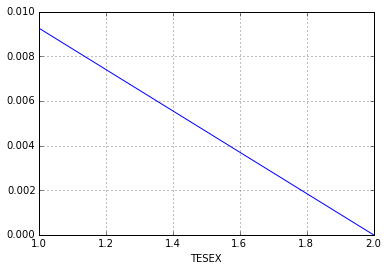

In [111]:
volunteer_by_sex = summary_volunteer.groupby("TESEX").aggregate(np.sum)
volunteer_by_sex["mean_minutes"] = volunteer_by_sex.weighted_minutes / volunteer_by_sex.weight
volunteer_by_sex.mean_minutes.plot()

In [112]:
summary.TESEX.corr(summary.t150301)

-0.010437797804251473